In [6]:
import glob
import numpy as np
import scipy.signal as scs
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from scipy.signal import savgol_filter
import CESfunctionsIASC as cf

In [2]:
##### What METADATA do we need?
# Unprocessed data filenames
sample_matrix = r'D:\IASC_IBBCEAS_Reanalysis\data\NO3\20240221\Imeas2402211806.npy'#the measurement NPY matrix
background_txt = r'D:\IASC_IBBCEAS_Reanalysis\data\NO3\20240221\Ib2402211326.txt'#the background (blank) TXT matrix

##### Processed data filenames
##### Depending on the number of columns the Mfile has, the call function variables need to be changed in the cell below (see comment)#####
#Mfile_name = # the Mfile with all the data
#Mfile_true = # the Mfile with the true concentrations

##### Reference filenames
reference1_name = r'D:\IASC_IBBCEAS_Reanalysis\NO2_IASC_3.npy'# name of reference 1 NPY file
#reference2_name = # name of reference 2 NPY file
#reference3_name = # name of reference 3 NPY file (optional, if needed by the cavity, e.g. NO3 uses NO3, NO2 and H2O)

##### Cavity and spectra parameters
lower_wavelength,upper_wavelength,distance=(650,672,500)
Reff = 0.9994277 # a number if constant, np.load('Reff.npy') if a vector, this is our initial Reff guess
#Reff = Reff.reshape(len(Reff),1) # uncomment this only if Reff is a vector
dfactor = 1 #the dilution factor is always 1 at IASC
start_avg = 1#from which background number to start averaging

In [3]:
##### File loading
samples = np.load(sample_matrix)
background = np.loadtxt(background_txt)
#dateM,ppb1M,ppb2M,intM = cf.Mfile_read(Mfile_name) #change number of variables as needed
#dateMT,ppb1MT,ppb2MT,intMT = cf.Mfile_read(Mfile_true) #change number of variables as needed
reference1=np.load(reference1_name)
#reference2=np.load(reference2_name)
#reference3=np.load(reference3_name) #uncomment if needed


In [45]:
##### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(samples,lower_wavelength,upper_wavelength)
sample=np.copy(samples[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
#ref2=np.copy(reference2[minwave:maxwave,:])
#ref3=np.copy(reference3[minwave:maxwave,:]) #uncomment if needed
I_0 = np.average(bckg[:,start_avg:],axis=1).reshape(len(bckg),1)

In [46]:
## calculate Reff, single file

(171, 1)
(171, 1)


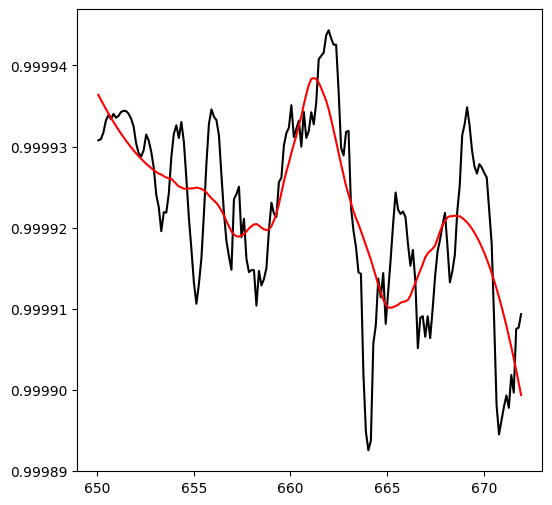

In [92]:
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)
#startn= #measurement to start
#itns= #number of measurements to observe
ref1col=ref1[:,1].reshape(len(ref1),1)
#ref2=ref2[:,1].reshape(len(ref2),1)
#ref3=ref3.reshape(len(ref3),1)
filters = np.arange(len(I_0))
I_sample = np.average(sample[:,25:30],axis=1).reshape(len(sample),1)
a = (1/distance)*((I_0/I_sample)-1)
print(a.shape)
# change the number of references as needed
Reff_curve = 1-((ref1col*16*2.5e10)/a)
print(Reff_curve.shape)
    
#filters = np.column_stack((filters,savgol_filter(Reff_curve,50,2)))
    
ax1.plot(sample[:,0],Reff_curve,'-k')
ax1.plot(sample[:,0],savgol_filter(Reff_curve[:,0],50,2),'-r')

#ax1.plot(no2ref[:,0],np.average(filters[:,1:],axis=1),'-c')

In [ ]:
##### Recalculate Reff ... many files

(0.9999, 1.0)

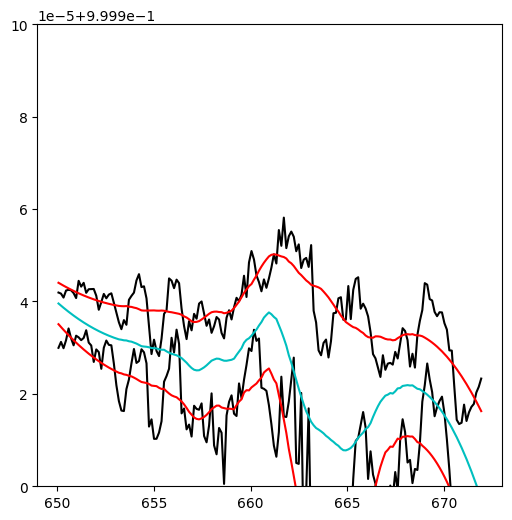

In [81]:
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)
startn=21 #measurement to start
itns= 2#number of measurements to observe
ref1col=ref1[:,1].reshape(len(ref1),1)
#ref2=ref2[:,1].reshape(len(ref2),1)
#ref3=ref3.reshape(len(ref3),1)
filters = np.arange(len(I_0))
for i in range(itns):
    I_sample = sample[:,startn+i].reshape(len(sample),1)

    a = (1/distance)*((I_0/I_sample)-1)
    #print(a.shape)
    # change the number of references as needed
    Reff_curve = 1-((ref1col*13.6*2.5e10)/a)
    #print(Reff_curve.shape)
    
    filters = np.column_stack((filters,savgol_filter(Reff_curve[:,0],50,2)))
    
    ax1.plot(sample[:,0],Reff_curve,'-k')
    ax1.plot(sample[:,0],savgol_filter(Reff_curve[:,0],50,2),'-r')

ax1.plot(sample[:,0],np.average(filters[:,1:],axis=1),'-c')
ax1.set_ylim(.9999,1)

In [ ]:
#save new Reff file
#np.save('Reff.npy',np.average(filters[:,1:],axis=1))

In [ ]:
#see your extinctions

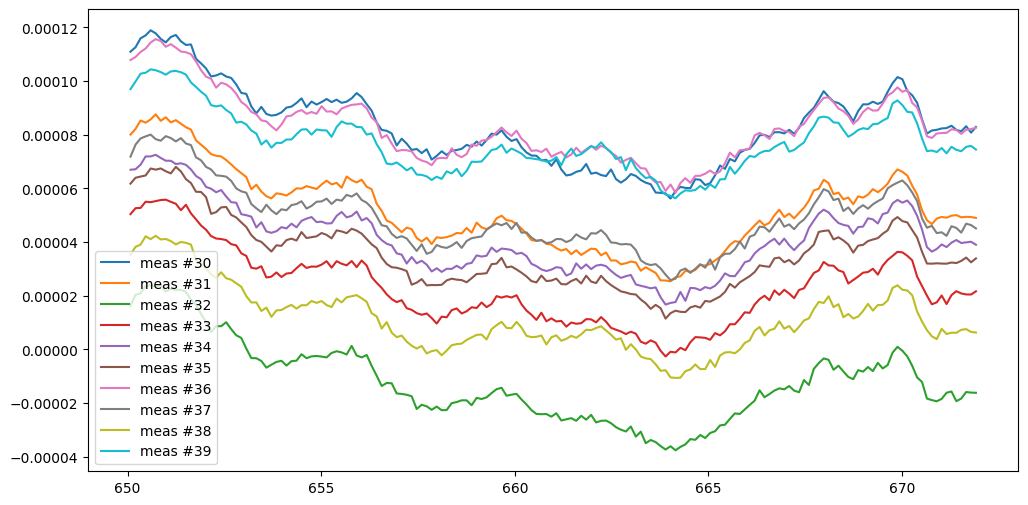

In [89]:
f= plt.figure(figsize=(12,6))
ax1 = f.add_subplot(111)
startn= 30#measurement to start
itns= 10#number of measurements to observe
for i in range(itns):
    I_sample = sample[:,startn+i].reshape(len(sample),1)

    a = (1/distance)*((I_0/I_sample)-1)


    #filters = np.column_stack((filters,savgol_filter(Reff_curve,100,2)))
    
    ax1.plot(sample[:,0],a,label='meas #%i' %(startn+i))
    #ax1.plot(sample[:,0],savgol_filter(Reff_curve[:,0],50,2),'-r')

ax1.legend()
#ax1.plot(no2ref[:,0],np.average(filters[:,1:],axis=1),'-c')
